# Figure 1: Benchmark of few shot predictions

In [1]:
import numpy as np
import pandas as pd

## DMS dataset (Bloom)

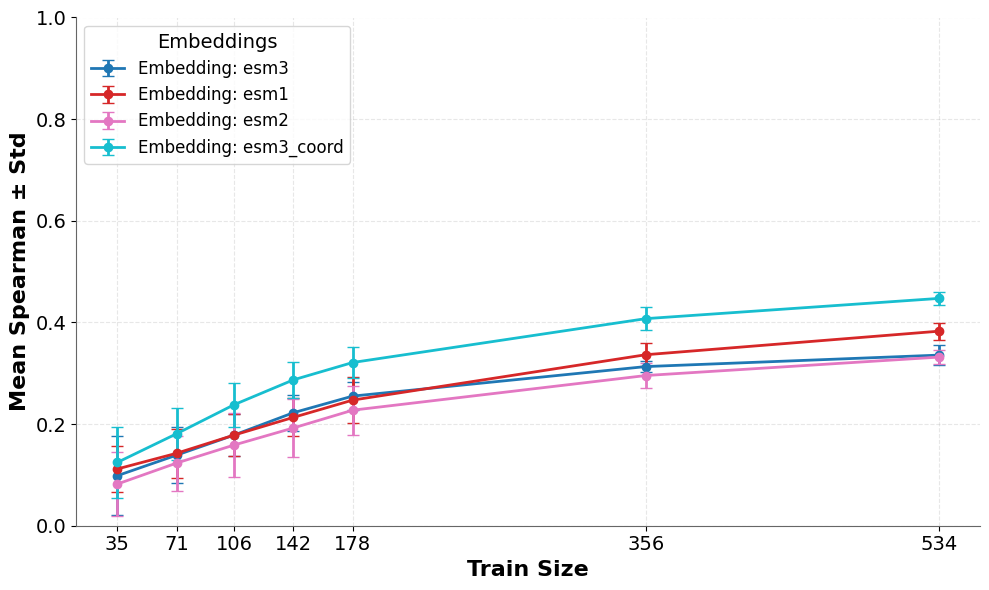

In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

# Load the saved results
file_path = "../script_results/few_shot_benchmark_bloom.pkl"
dilution = (178 * np.array([0.2, 0.4, 0.6, 0.8, 1, 2, 3])).astype(int)

with open(file_path, "rb") as f:
    results = pickle.load(f)

# Prepare data for plotting
embeds = set([key[0] for key in results.keys()])
predictor_to_plot = "gp_predictor_sklearn"

# Plot settings
plt.figure(figsize=(10, 6))
colors = plt.cm.tab10(np.linspace(0, 1, len(embeds)))  # Use tab10 colormap for embedding colors

for i, (embed, color) in enumerate(zip(embeds, colors)):
    key = (embed, predictor_to_plot)
    if key in results:
        mean_auc = results[key]['mean_spearman']
        std_auc = results[key]['std_spearman']
        plt.errorbar(
            dilution,
            mean_auc,
            yerr=std_auc,
            label=f"Embedding: {embed}",
            capsize=4,
            fmt='-o',  # Line with circular markers
            linewidth=2,
            color=color
        )

# Customize plot aesthetics
# plt.title(f"Bloom Dataset, Predictor '{predictor_to_plot}' Across Embeddings", fontsize=18, pad=20, fontweight='bold')
plt.xlabel("Train Size", fontsize=16, fontweight='bold')
plt.ylabel("Mean Spearman ± Std", fontsize=16, fontweight='bold')
plt.ylim(0, 1)
plt.xticks(dilution, fontsize=14)
plt.yticks(fontsize=14)
plt.grid(visible=True, linestyle='--', alpha=0.3)

# Custom legend
plt.legend(title="Embeddings", title_fontsize=14, fontsize=12, loc="upper left", frameon=True)

# Remove unnecessary spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('#666666')
plt.gca().spines['bottom'].set_color('#666666')

# Save the figure in high resolution
plt.tight_layout()
plt.savefig('../figures/bloom_dataset_predictor_results.png', dpi=1200, bbox_inches='tight')

# Display plot
plt.show()


## CM dataset (Desai)

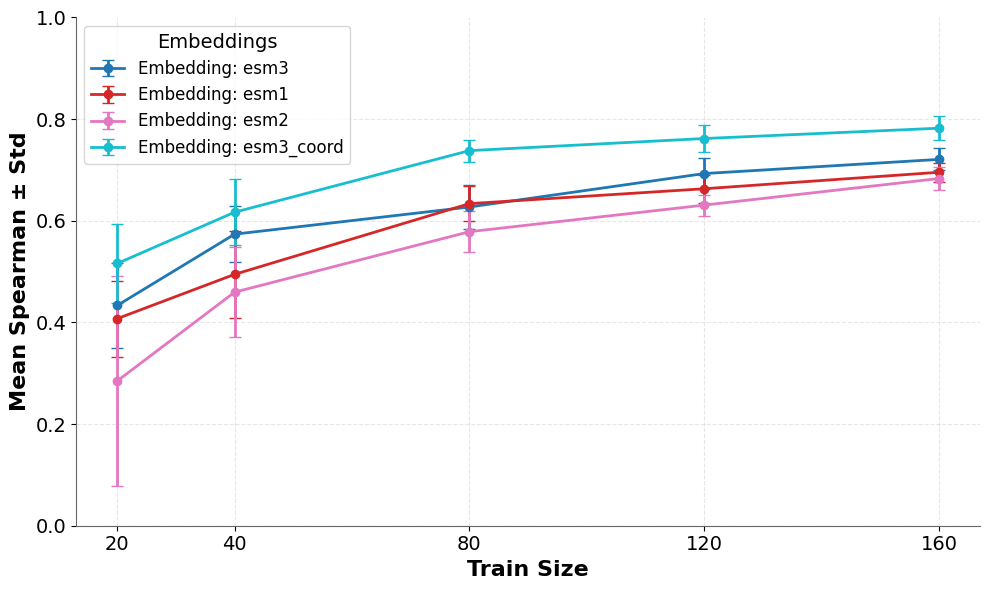

In [3]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

# Load the saved results
file_path = "../script_results/few_shot_benchmark_desai.pkl"
dilution = [20, 40, 80, 120, 160]

with open(file_path, "rb") as f:
    results = pickle.load(f)

# Prepare data for plotting
embeds = set([key[0] for key in results.keys()])
predictor_to_plot = "gp_predictor_sklearn"

# Plot settings
plt.figure(figsize=(10, 6))
colors = plt.cm.tab10(np.linspace(0, 1, len(embeds)))  # Use tab10 colormap for embedding colors

for i, (embed, color) in enumerate(zip(embeds, colors)):
    key = (embed, predictor_to_plot)
    if key in results:
        mean_auc = results[key]['mean_spearman']
        std_auc = results[key]['std_spearman']
        
        # Plot with error bars
        plt.errorbar(
            dilution,
            mean_auc,
            yerr=std_auc,
            label=f"Embedding: {embed}",
            capsize=4,
            fmt='-o',  # Line with circular markers
            linewidth=2,
            color=color
        )

# Customize plot aesthetics
# plt.title(f"Desai Dataset, Predictor '{predictor_to_plot}' Across Embeddings", fontsize=18, pad=20, fontweight='bold')
plt.xlabel("Train Size", fontsize=16, fontweight='bold')
plt.ylabel("Mean Spearman ± Std", fontsize=16, fontweight='bold')
plt.ylim(0, 1)
plt.xticks(dilution, fontsize=14)
plt.yticks(fontsize=14)
plt.grid(visible=True, linestyle='--', alpha=0.3)

# Custom legend
plt.legend(title="Embeddings", title_fontsize=14, fontsize=12, loc="upper left", frameon=True)

# Remove unnecessary spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('#666666')
plt.gca().spines['bottom'].set_color('#666666')

# Save the figure in high resolution
plt.tight_layout()
plt.savefig('../figures/desai_dataset_predictor_results.png', dpi=1200, bbox_inches='tight')

# Display plot
plt.show()
